In [1]:
using Graphs

g = KarateGraph()
A = adjacency_matrix(KarateGraph())

using DrWatson
quickactivate(@__DIR__)

using PolarizationFramework

┌ Info: Precompiling PolarizationFramework [cf6d9426-9fb6-11ec-3bc5-a3163c23dd97]
└ @ Base loading.jl:1342


In [4]:
triads = get_triads(A)
links = get_links_in_triads(triads)
A2 = get_adj_necessary_links(size(A)[1], links; typ = Float64)

34×34 Matrix{Float64}:
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

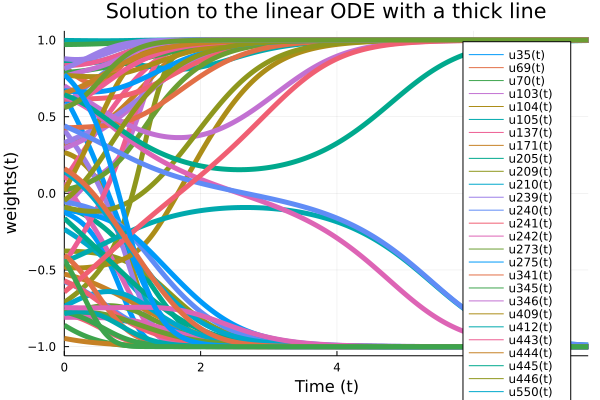

In [10]:
n = size(A2)[1]
attr = BinaryAttributes(3)

gamma = 0.0001
maxtime = 10000.
ode_fun = PolarizationFramework.Heider73!
# ode_fun = Heider72!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = true

(ishb_sim_par, solend, solu, u0, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot;
    existing_links = A2);

In [11]:
ishb_sim_par

10-element Vector{Any}:
  true
 false
     0.058823529411764705
     0.9997118116801589
 false
 false
      [10.0, 0.0, 35.0, 0.0]
  true
     0.7777777777777778
  true

In [ ]:
ishb_sim_par

10-element Vector{Any}:
  true
 false
     0.058823529411764705
     0.9997118116801589
 false
 false
      [10.0, 0.0, 35.0, 0.0]
  true
     0.7777777777777778
  true

In [ ]:
ishb_sim_par

10-element Vector{Any}:
  true
 false
     0.058823529411764705
     0.9997118116801589
 false
 false
      [10.0, 0.0, 35.0, 0.0]
  true
     0.7777777777777778
  true

In [38]:
# x = solend
for (ti, triad) in enumerate(triads)
    i, j, k = triad
    if  prod((x[i,j], x[i,k], x[j,k])) < 0
        print(x[i,j], x[i,k], x[j,k])
        println(triad)
        println(ti)
        print("\n")
    end
end

In [37]:
x = solu.*A2
using LinearAlgebra
xs = sign.(Symmetric(x))
sum(xs * xs .* xs)

270.0

In [11]:
dx = similar(x)
lay1mul = zeros(n, n)
x_sim = zeros(n, n)

mask = triu(trues(size(u0)), 1)
mask .*= A2

p = (n, gamma .* xy_attr, lay1mul, x_sim, mask)

(34, [0.0 -0.03333333333333333 … 0.1 -0.1; 0.0 0.0 … -0.03333333333333333 0.03333333333333333; … ; 0.0 0.0 … 0.0 -0.1; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0])

In [12]:
Heider7!(dx, x, p, 0)

34×34 Matrix{Float64}:
  0.0   4.11708e-17   4.2096e-17   …   0.0          -0.0
  0.0   0.0           3.51571e-17     -0.0           0.0
  0.0   0.0           0.0              2.86808e-17  -0.0
  0.0   0.0           0.0             -0.0           0.0
  0.0   0.0           0.0              0.0          -0.0
 -0.0  -0.0          -0.0          …  -0.0           0.0
  0.0   0.0           0.0              0.0          -0.0
  0.0   0.0           0.0              0.0          -0.0
  0.0   0.0           0.0              4.30211e-17  -3.60822e-17
  0.0   0.0           0.0              0.0          -0.0
  0.0   0.0           0.0          …   0.0          -0.0
  0.0   0.0           0.0             -0.0           0.0
 -0.0  -0.0          -0.0             -0.0           0.0
  ⋮                                ⋱                
  0.0   0.0           0.0              2.86808e-17  -2.86808e-17
  0.0   0.0           0.0              2.12793e-17  -2.82182e-17
  0.0   0.0           0.0              0.0   

In [13]:
x

34×34 Matrix{Float64}:
 0.0  1.0  1.0  1.0  1.0  -1.0   1.0  1.0  …  0.0   0.0        0.0   0.0
 0.0  0.0  1.0  1.0  0.0   0.0   0.0  1.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  1.0  0.0   0.0   0.0  1.0     0.0   0.0        1.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   1.0  0.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0  -1.0  0.0  …  0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     1.0   0.0        1.0  -1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  …  0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0   0.0        0.0   0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0   0.0        0.0   0.0
 ⋮                         ⋮

In [14]:
condition_here(u, t, integrator) = condition2(u, t, integrator, mask)
affect!(integrator) = terminate!(integrator)

affect! (generic function with 1 method)

In [16]:
fc = (dx.*x)[mask] .> 0
all(fc)

true

In [18]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  44829
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                3129
Number of accepted steps:                          3129
Number of rejected steps:                          4342
Maximum eigenvalue recorded:                       1

In [44]:
triads

45-element Vector{Any}:
 (1, 2, 3)
 (1, 2, 4)
 (1, 2, 8)
 (1, 2, 14)
 (1, 2, 18)
 (1, 2, 20)
 (1, 2, 22)
 (1, 3, 4)
 (1, 3, 8)
 (1, 3, 9)
 (1, 3, 14)
 (1, 4, 8)
 (1, 4, 13)
 ⋮
 (21, 33, 34)
 (23, 33, 34)
 (24, 28, 34)
 (24, 30, 33)
 (24, 30, 34)
 (24, 33, 34)
 (25, 26, 32)
 (27, 30, 34)
 (29, 32, 34)
 (30, 33, 34)
 (31, 33, 34)
 (32, 33, 34)

In [59]:
using GLMakie, TikzGraphs#SGtSNEpi

┌ Info: Precompiling TikzGraphs [b4f28e30-c73f-5eaf-a395-8a9db949a742]
└ @ Base loading.jl:1342
┌ Info: Precompiling Poppler_jll [9c32591e-4766-534b-9725-b71a8799265b]
└ @ Base loading.jl:1342


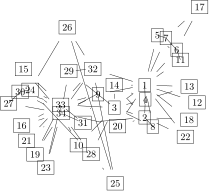

In [65]:
g = KarateGraph()

TikzGraphs.plot(g, Layouts.Spring(), node_style="draw", options="scale=2")

In [33]:
triads[25:end]

21-element Vector{Any}:
 (3, 4, 14)
 (3, 9, 33)
 (6, 7, 17)
 (9, 31, 33)
 (9, 31, 34)
 (9, 33, 34)
 (15, 33, 34)
 (16, 33, 34)
 (19, 33, 34)
 (21, 33, 34)
 (23, 33, 34)
 (24, 28, 34)
 (24, 30, 33)
 (24, 30, 34)
 (24, 33, 34)
 (25, 26, 32)
 (27, 30, 34)
 (29, 32, 34)
 (30, 33, 34)
 (31, 33, 34)
 (32, 33, 34)

In [27]:
sum([7 in triad for triad in triads])

3

In [22]:
triangles(g)[[6,7,17,27,30,34,29,32]]

8-element Vector{Int64}:
  3
  3
  1
  1
  4
 15
  1
  3

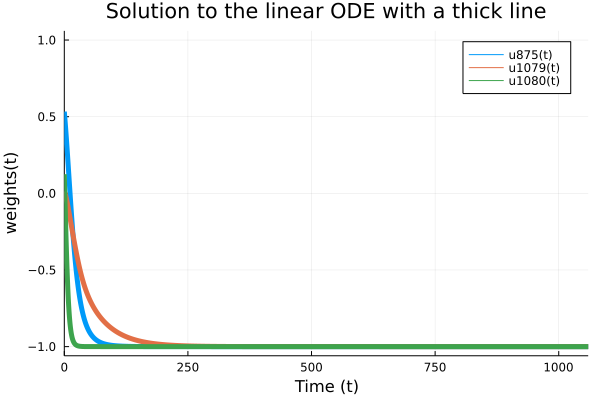

In [110]:
mask2 = zeros(Bool, size(mask))
mask2[25,26] = 1
mask2[25,32] = 1
mask2[26,32] = 1

h = plot(
            sol,
            linewidth = 5,
            title = "Solution to the linear ODE with a thick line",
            xaxis = "Time (t)",
            yaxis = "weights(t)",
            ylim = [-1, +1],
            vars = reshape(1:n^2, n, n)[mask2],
        )

In [98]:
reshape(1:n^2, n, n)[mask2]

LoadError: BoundsError: attempt to access 34×34 reshape(::UnitRange{Int64}, 34, 34) with eltype Int64 at index [[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]]

In [10]:
using LinearAlgebra
triangles(Graph(Symmetric(A2)))

34-element Vector{Int64}:
 18
 12
 11
 10
  2
  3
  3
  6
  5
  0
  2
  0
  1
  ⋮
  1
  4
  1
  1
  1
  1
  1
  4
  3
  3
 13
 15